## DataSet: Non-traffic Citations 
### By Mohammad Ryan Malik

### Analyzing Public Safety Through Non-Traffic Citations in Pittsburgh

In this analysis, I explore patterns of non-traffic citations across Pittsburgh neighborhoods using open data from the WPRDC. Citations can serve as a proxy for public safety by identifying areas with high or low levels of minor offenses. This analysis supports the broader goal of our group project: defining a data-driven metric for the “best” neighborhood in Pittsburgh. 

I chose to focus on **public safety** as my individual submetric, where fewer non-traffic citations suggest a safer neighborhood. Using citation data, I investigate trends by neighborhood, time, race, and age to identify safety patterns and disparities across the city.


### Data Cleaning and Preparation


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
citations = pd.read_csv('citations.csv')
print(citations.info())
cols_to_keep = ['GENDER', 'RACE', 'AGE', 'CITEDTIME', 'OFFENSES', 'NEIGHBORHOOD', 'X', 'Y']
citations = citations[cols_to_keep]
citations = citations.dropna(subset=['NEIGHBORHOOD'])
citations['CITEDTIME'] = pd.to_datetime(citations['CITEDTIME'], errors='coerce')
citations['YEAR'] = citations['CITEDTIME'].dt.year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16295 entries, 0 to 16294
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    16295 non-null  int64  
 1   PK                     16295 non-null  int64  
 2   CCR                    16295 non-null  object 
 3   GENDER                 16232 non-null  object 
 4   RACE                   16214 non-null  object 
 5   AGE                    16223 non-null  float64
 6   CITEDTIME              16295 non-null  object 
 7   INCIDENTLOCATION       16295 non-null  object 
 8   OFFENSES               16295 non-null  object 
 9   NEIGHBORHOOD           15379 non-null  object 
 10  ZONE                   16295 non-null  object 
 11  INCIDENTTRACT          15383 non-null  object 
 12  COUNCIL_DISTRICT       14453 non-null  float64
 13  PUBLIC_WORKS_DIVISION  14453 non-null  float64
 14  X                      14493 non-null  float64
 15  Y 

## Top and Bottom Neighborhoods by Citation Count

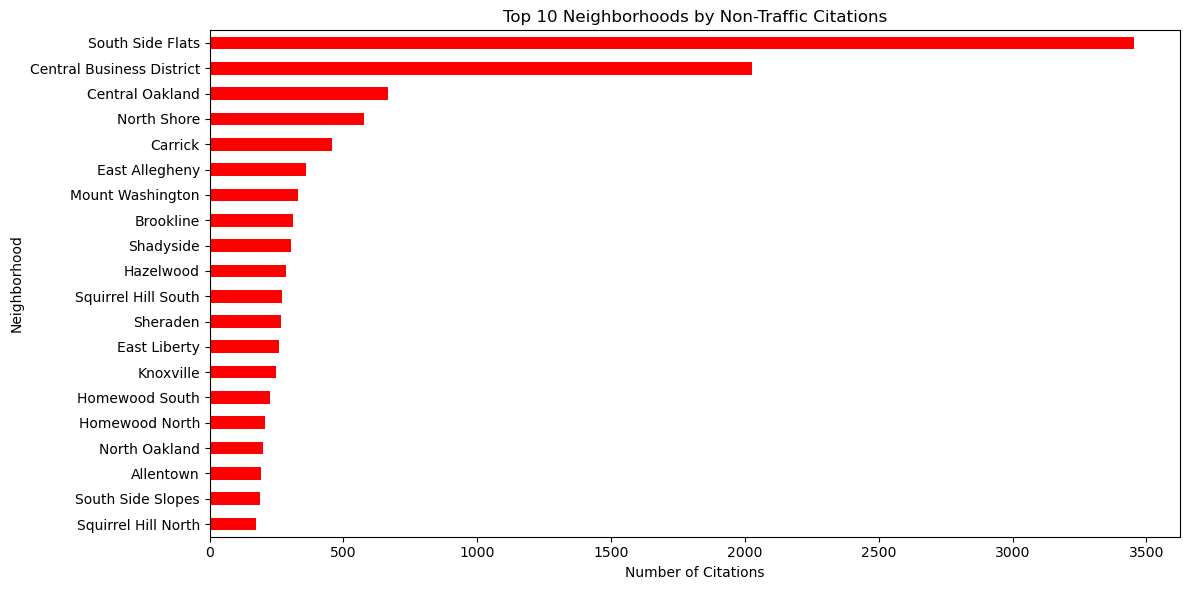

In [12]:
# Count citations per neighborhood
neighborhood_counts = citations['NEIGHBORHOOD'].value_counts().head(20)
# Plot
plt.figure(figsize=(12, 6))
neighborhood_counts.sort_values().plot(kind='barh', color='red')
plt.title('Top 10 Neighborhoods by Non-Traffic Citations')
plt.xlabel('Number of Citations')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()

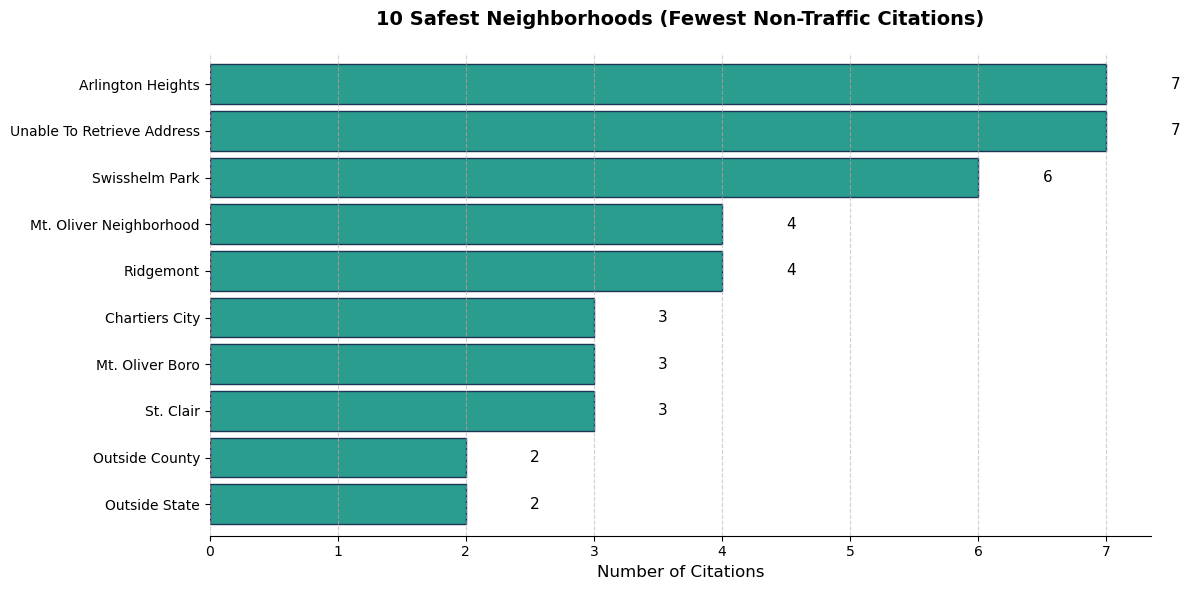

In [13]:
neighborhood_counts = citations['NEIGHBORHOOD'].value_counts().nsmallest(10)

plt.figure(figsize=(12, 6))
ax = neighborhood_counts.sort_values(ascending=True).plot(
    kind='barh',
    color='#2a9d8f',  
    edgecolor='#1d3557',
    width=0.85
)
plt.title('10 Safest Neighborhoods (Fewest Non-Traffic Citations)', 
         fontsize=14, pad=20, weight='bold')
plt.xlabel('Number of Citations', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
for i, v in enumerate(neighborhood_counts.sort_values()):
    ax.text(v + 0.5, i, f"{int(v)}", 
            color='black', 
            va='center',
            fontsize=11)
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()
plt.show()

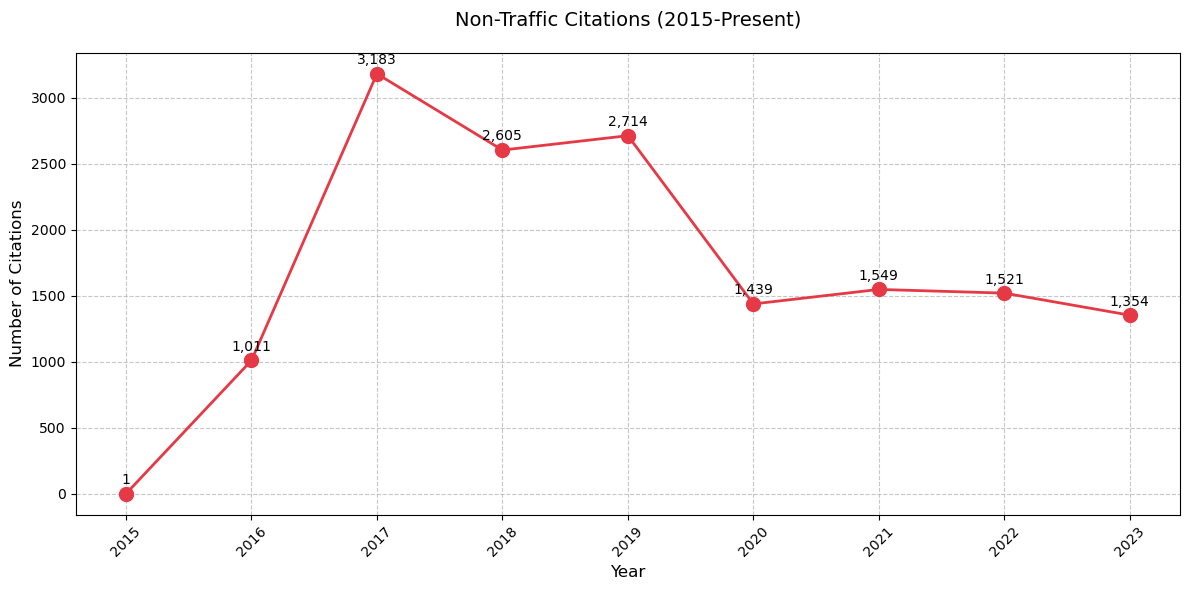

In [14]:
citations_2015plus = citations[citations['YEAR'] >= 2015]
annual_counts = citations_2015plus.groupby('YEAR').size()
plt.figure(figsize=(12, 6))
ax = annual_counts.plot(marker='o', 
                       linestyle='-', 
                       color='#e63946', 
                       linewidth=2, 
                       markersize=10)

plt.title('Non-Traffic Citations (2015-Present)', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Citations', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
for x, y in zip(annual_counts.index, annual_counts.values):
    ax.text(x, y+50, f'{y:,}', ha='center', va='bottom', fontsize=10)
# Adjust x-axis ticks to show every year
plt.xticks(annual_counts.index, rotation=45)
plt.tight_layout()
plt.show()

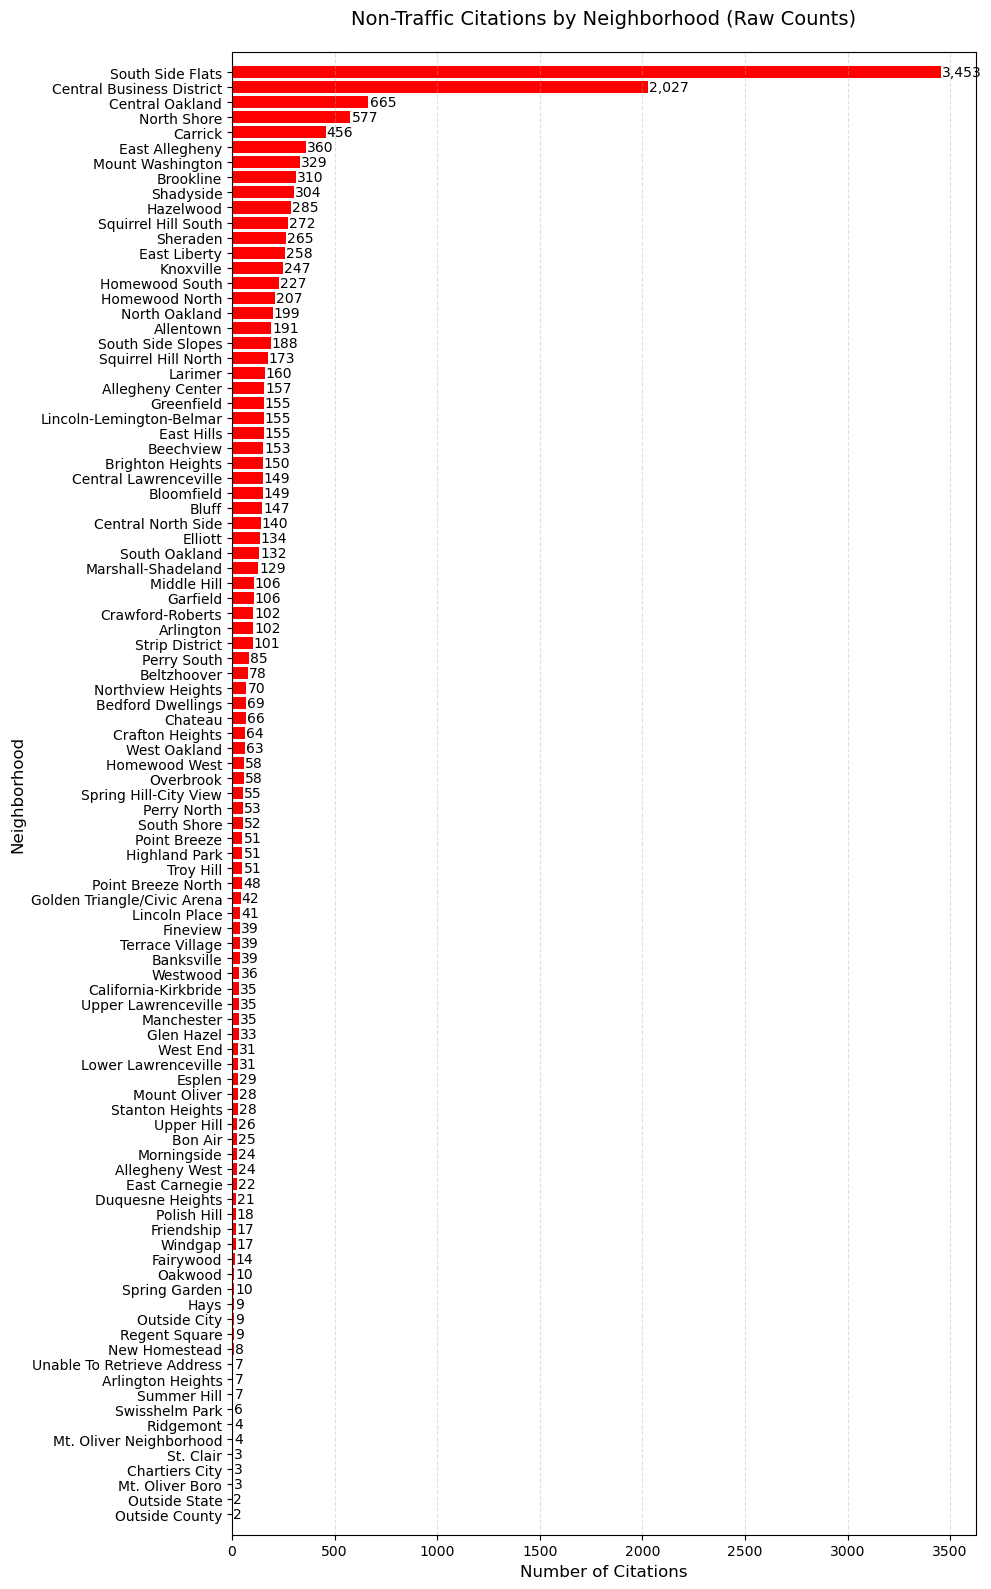

In [15]:
# Get neighborhood counts (sorted ascending)
neighborhood_counts = citations['NEIGHBORHOOD'].value_counts().sort_values()

# Create plot
plt.figure(figsize=(10, 16))
bars = plt.barh(neighborhood_counts.index, neighborhood_counts.values, 
               color='red', height=0.8)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}', 
             va='center', ha='left', fontsize=10)

#Plotting
plt.title('Non-Traffic Citations by Neighborhood (Raw Counts)', fontsize=14, pad=20)
plt.xlabel('Number of Citations', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.margins(y=0.01)
plt.tight_layout()
plt.show()

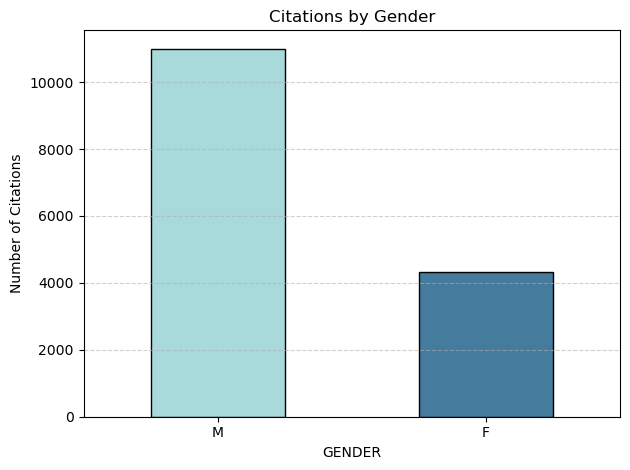

In [16]:
gender_counts = citations['GENDER'].value_counts()
gender_counts.plot(kind='bar', color=['#a8dadc', '#457b9d'], edgecolor='black')
plt.title('Citations by Gender')
plt.ylabel('Number of Citations')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


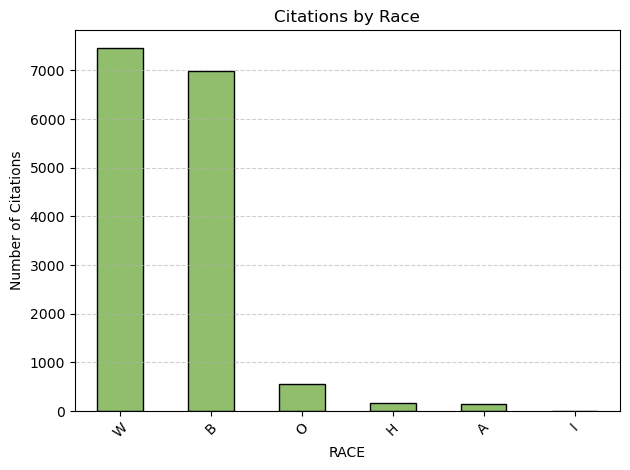

In [17]:
race_counts = citations['RACE'].value_counts()
race_counts.plot(kind='bar', color='#90be6d', edgecolor='black')
plt.title('Citations by Race')
plt.ylabel('Number of Citations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


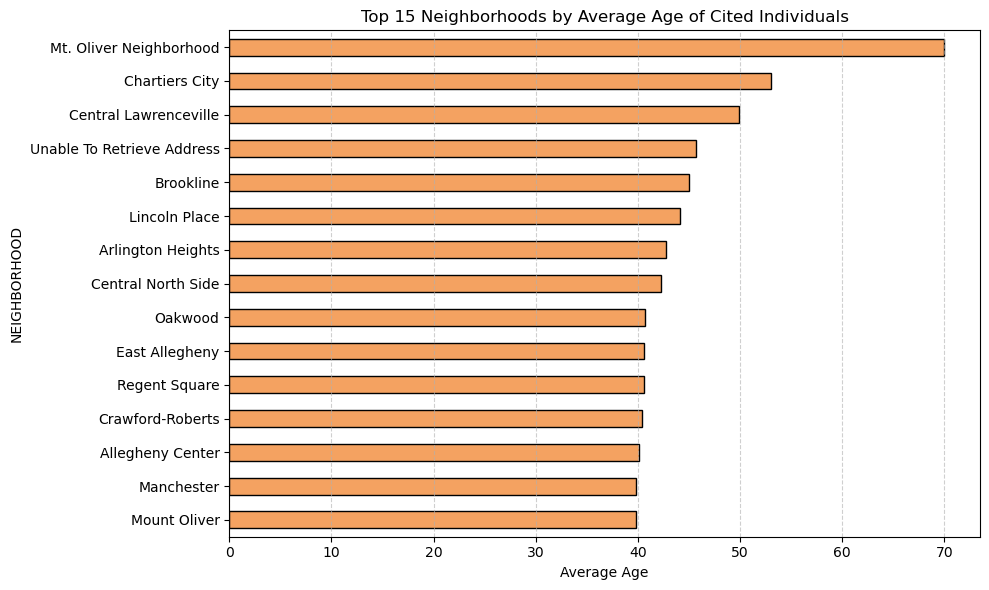

In [18]:
age_by_neighborhood = citations.groupby('NEIGHBORHOOD')['AGE'].mean().dropna()
top_ages = age_by_neighborhood.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_ages.sort_values().plot(kind='barh', color='#f4a261', edgecolor='black')
plt.xlabel('Average Age')
plt.title('Top 15 Neighborhoods by Average Age of Cited Individuals')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


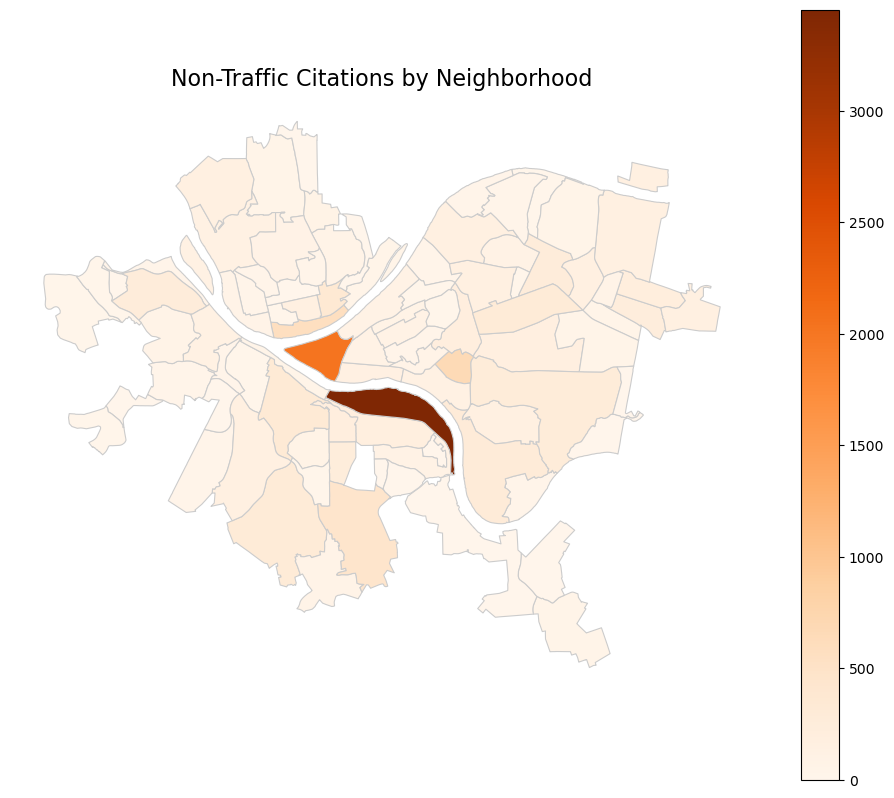

In [19]:
import geopandas as gpd
# Load citation data again
citations = pd.read_csv('citations.csv')
cols_to_keep = ['NEIGHBORHOOD', 'X', 'Y']
citations = citations[cols_to_keep]
citations = citations.dropna(subset=['NEIGHBORHOOD'])

# Count citations per neighborhood
citation_counts = citations['NEIGHBORHOOD'].value_counts().reset_index()
citation_counts.columns = ['NEIGHBORHOOD', 'Citation_Count']

# Load the shapefile for Pittsburgh neighborhoods
gdf = gpd.read_file("Neighborhoods_.shp")

# Merge citation counts with geodata
merged = gdf.merge(citation_counts, how='left', left_on='hood', right_on='NEIGHBORHOOD')

# Fill NaN citation counts with 0
merged['Citation_Count'] = merged['Citation_Count'].fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
merged.plot(column='Citation_Count', 
            cmap='Oranges', 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend=True)

ax.set_title('Non-Traffic Citations by Neighborhood', fontsize=16)
ax.axis('off')
plt.show()


## Conclusion

This analysis provides a snapshot of public safety across Pittsburgh neighborhoods based on non-traffic citations. Safer neighborhoods tend to have lower citation counts, while a few consistently report higher numbers. Demographic patterns also highlight disparities in citation rates by race and gender. These insights feed into our group’s final “best neighborhood” metric, where safety plays a key role.
